In [1]:
# Kernel methods

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

params = {'legend.fontsize': 20,
          'figure.figsize': (12, 8),
          'axes.labelsize': 20,
          'axes.titlesize': 24,
          'xtick.labelsize':16,
          'ytick.labelsize': 16}
mpl.rcParams.update(params)

%matplotlib inline

In [3]:
data = pd.read_csv("element_data.csv", index_col=0)
print(data.head())

             K       MP      BP   Z     X     r
Element                                        
Ac        29.0  1323.00  3573.0  89  1.10  1.95
Ag        88.0  1234.93  2435.0  47  1.93  1.60
Al        83.0   933.47  2792.0  13  1.61  1.25
As        40.0  1090.00   887.0  33  2.18  1.15
Au       137.0  1337.33  3129.0  79  2.54  1.35


In [4]:
data["sqrt(X)"] = data["X"] ** 0.5
features = ["MP", "BP", "sqrt(X)"]
x = data[features]
y = data["K"]

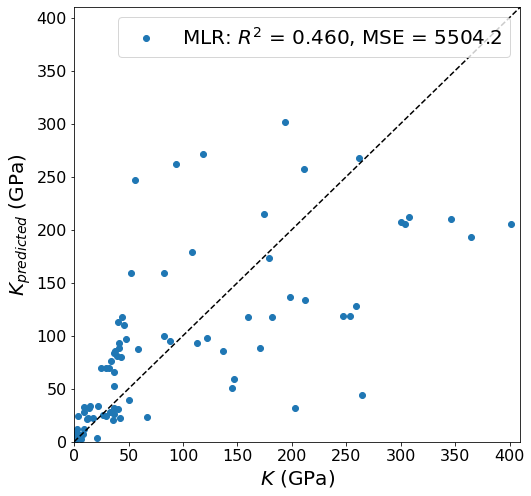

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import r2_score, mean_squared_error

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor()
yhat_knn = cross_val_predict(knn, x, y, cv=kfold)
r2_knn = r2_score(y, yhat_knn)
mse_knn = mean_squared_error(y, yhat_knn)
label_knn = "MLR: $R^2$ = %.3f, MSE = %.1f" % (r2_knn, mse_knn)

f, ax = plt.subplots(figsize=(8, 8))
plt.plot(y, yhat_knn, 'o', label=label_knn)
plt.ylabel(r"$K_{predicted}$ (GPa)")
plt.xlabel(r"$K$ (GPa)")
plt.legend()
plt.xlim([0, 410])
plt.ylim([0, 410])
plt.plot([0, 410], [0, 410], 'k--');

In [6]:
# grid search for optimal parameters

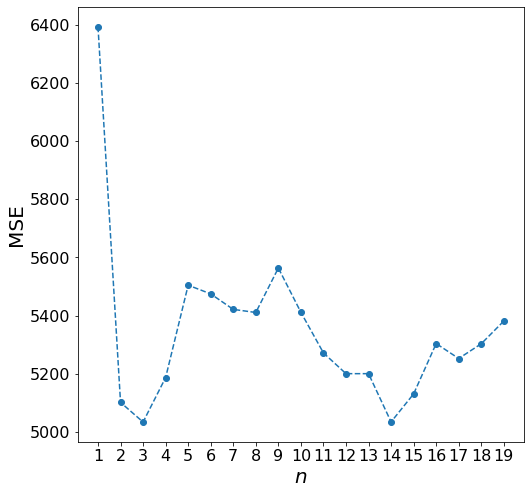

In [7]:
mses = []
for n in range(1, 20):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    knn = KNeighborsRegressor(n_neighbors=n)
    yhat_knn = cross_val_predict(knn, x, y, cv=kfold)
    r2_knn = r2_score(y, yhat_knn)
    mses.append((n, mean_squared_error(y, yhat_knn)))

mses = pd.DataFrame(mses, columns=["n", "MSE"])
    
f, ax = plt.subplots(figsize=(8, 8))
plt.plot(mses["n"], mses["MSE"], 'o--')
plt.xticks(range(1, 20))
plt.ylabel(r"MSE")
plt.xlabel(r"$n$");

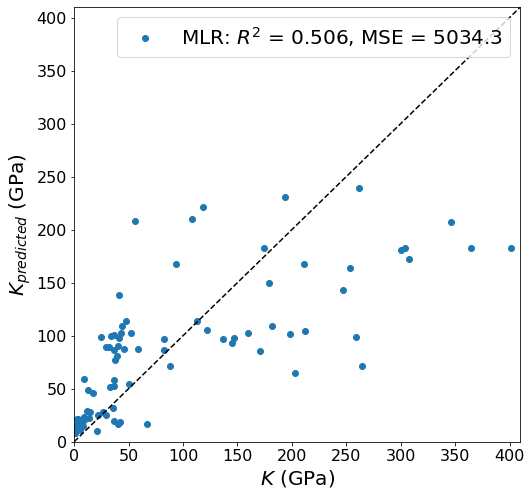

In [10]:
# seen data
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=14)
yhat_knn = cross_val_predict(knn, x, y, cv=kfold)
r2_knn = r2_score(y, yhat_knn)
mse_knn = mean_squared_error(y, yhat_knn)
label_knn = "MLR: $R^2$ = %.3f, MSE = %.1f" % (r2_knn, mse_knn)

f, ax = plt.subplots(figsize=(8, 8))
plt.plot(y, yhat_knn, 'o', label=label_knn)
plt.ylabel(r"$K_{predicted}$ (GPa)")
plt.xlabel(r"$K$ (GPa)")
plt.legend()
plt.xlim([0, 410])
plt.ylim([0, 410])
plt.plot([0, 410], [0, 410], 'k--');

In [9]:
# Smooth kernels

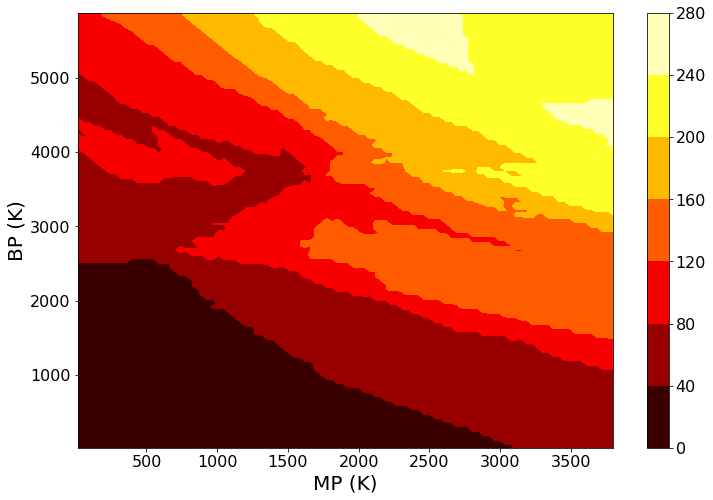

In [11]:
mps = np.linspace(min(data["MP"]), max(data["MP"]), 100)
bps = np.linspace(min(data["BP"]), max(data["BP"]), 100)
mps, bps = np.meshgrid(mps, bps)

import itertools
x_grid = pd.DataFrame({"MP": mps.ravel(), "BP": bps.ravel()})
x_grid["sqrt(X)"] = np.sqrt(2)
knn = KNeighborsRegressor(n_neighbors=14)
knn.fit(x, y)
k = np.zeros(mps.shape)
for i, j in itertools.product(range(mps.shape[0]), range(mps.shape[1])):
    k[i, j] = knn.predict([[mps[i, j], bps[i, j], 2]])

f, ax = plt.subplots(figsize=(12, 8))
plt.contourf(mps, bps, k, cmap=plt.cm.hot)
plt.colorbar()
plt.xlabel("MP (K)")
plt.ylabel("BP (K)");

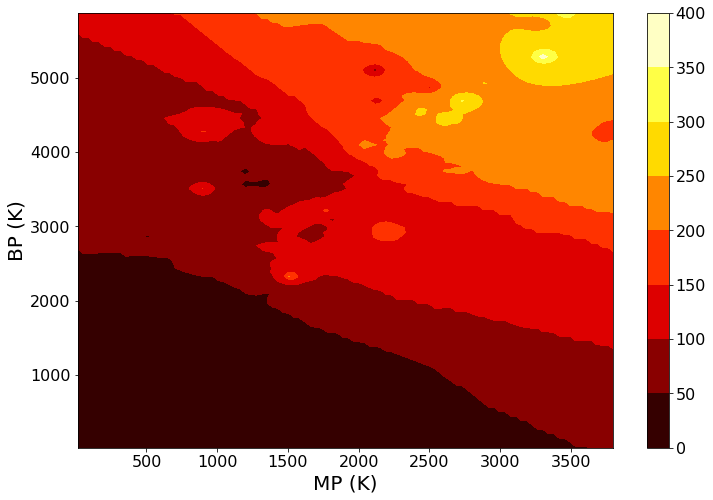

In [12]:
import itertools
x_grid = pd.DataFrame({"MP": mps.ravel(), "BP": bps.ravel()})
x_grid["sqrt(X)"] = np.sqrt(2)
knn = KNeighborsRegressor(n_neighbors=14, weights='distance')
knn.fit(x, y)
k = np.zeros(mps.shape)
for i, j in itertools.product(range(mps.shape[0]), range(mps.shape[1])):
    k[i, j] = knn.predict([[mps[i, j], bps[i, j], 2]])

f, ax = plt.subplots(figsize=(12, 8))
plt.contourf(mps, bps, k, cmap=plt.cm.hot)
plt.colorbar()
plt.xlabel("MP (K)")
plt.ylabel("BP (K)");